In [ ]:
######## import laibraries

import torch
import torchvision  # when we work on images
from torchvision.datasets import MNIST

In [ ]:
######### Download Training DataSet

dataset = MNIST(root='data/' , download=True)

In [ ]:
##### when we look the type of dataset

type(dataset)

#dataset.classes


torchvision.datasets.mnist.MNIST

In [ ]:
##### Check the lenght of dataset
len(dataset)

60000

In [ ]:
########## the dataset has 60,000 images which can be used to train the model. there is also an additional test set of 10,000 images which can be created by passing train=False
########## to the MNIST class


test_dataset = MNIST(root='data/', train=False)
len(test_dataset)

10000

In [ ]:
######## let's look at a sample element from the training dataset.


dataset[0]

### output= <PIL.Image.Image image mode=L size=28x28>, 5    input: <PIL.Image.Image image mode=L size=28x28>   ,    label: 5

(<PIL.Image.Image image mode=L size=28x28>, 5)

In [ ]:
#########  Display image using this library

import matplotlib.pyplot as plt
%matplotlib inline
 # it will be visible all the time (no pop_up)
# Statements starting with % are called Ipython magic commands

Label: 5


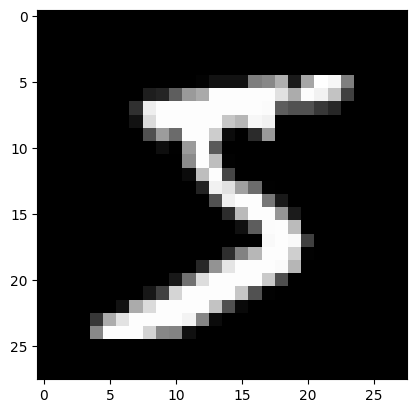

In [ ]:
### let's look at a couple of images from the dataset.

image, label = dataset[0]
plt.imshow(image, cmap='gray')
print('Label:' , label)

Label: 9


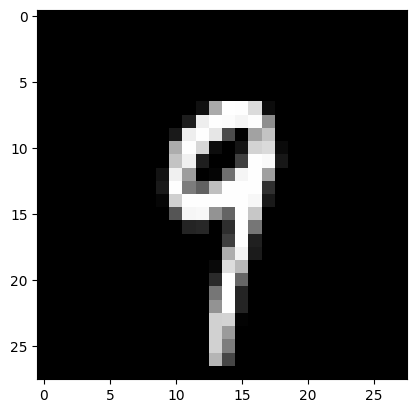

In [ ]:
### display image of 10th index

image, label = dataset[600]
plt.imshow(image, cmap='gray')
print('Label:' , label)

In [ ]:
###### Pytorch does not know how to work with images. we need to convert the images into tensors. we can do this by specifying a transfroms while creating our dataset.

import torchvision.transforms as transforms

In [ ]:
### MNIST dataset (images and labels)

dataset = MNIST(root='data/',
                train=True,
                transform=transforms.ToTensor())   ### convert PIL images into tensor

In [ ]:
img_tensor, label = dataset[0]
print(img_tensor.shape, label)     ### torch.Size([1, 28, 28]) 5   1 represents the color channel (RGB) / [batch_size, num_channels, height, width]

torch.Size([1, 28, 28]) 5


In [ ]:
##### print Actual tensor of the image

img_tensor

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,

In [ ]:
###### display a specefic rows and columns in a batch(img)
print(img_tensor[:,10:15,10:15])
print(torch.max(img_tensor), torch.min(img_tensor))


tensor([[[0.0039, 0.6039, 0.9922, 0.3529, 0.0000],
         [0.0000, 0.5451, 0.9922, 0.7451, 0.0078],
         [0.0000, 0.0431, 0.7451, 0.9922, 0.2745],
         [0.0000, 0.0000, 0.1373, 0.9451, 0.8824],
         [0.0000, 0.0000, 0.0000, 0.3176, 0.9412]]])
tensor(1.) tensor(0.)


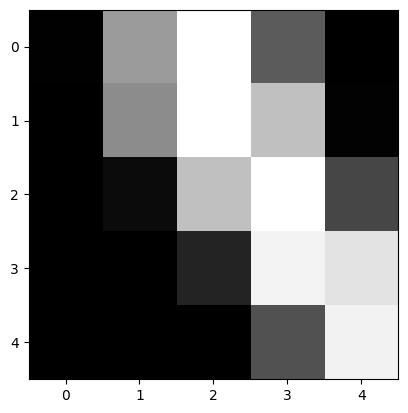

In [ ]:
### plot the image by passing in the 28*28 matrix

plt.imshow(img_tensor[0, 10:15, 10:15], cmap='gray')    # Also called zomming of an image.

In [ ]:
### 1. Training set     2. validation set      3. test set

### let's set aside 10000 randomly chosen images for validation. we can do this using the random_spilt method from pytorch



from torch.utils.data import random_split

train_ds , val_ds = random_split(dataset, [50000, 10000])
len(train_ds), len(val_ds)

(50000, 10000)

In [ ]:
from torch.utils.data import DataLoader

batch_size = 128

train_loader = DataLoader(train_ds, batch_size, shuffle=True)
val_loader = DataLoader(val_ds, batch_size)

In [ ]:
############## Creat Model ################

### Now that we have prepared out data loader, we can define our model.

### 1. A logistic regression moldel is almost identical to a linear regression model i.e there are weights and bias matrices,
# and the output is obtained using simple matrix operations (pred = x@ w.t()+b)
### 2. just as we did with linear regression , we can use nn.linear to create the model instead of defining and initiallizing the matrics manualy.
### 3. since nn.linear expects the each training example to be a vector, each 1*28*28 image tensor needs to be flattened out into a vector of size 784(28*28),
# before being passed into the model.
### the output for each image is vector of size 10 due to 10 classes, with each element of the vector signifying the probability a particular target label(i.e 0 to 9).
#the predicted label for an image is simpy the one with the highest probability

In [ ]:
import torch.nn as nn

input_size = 28*28
num_classes= 10

#Logistic Regression model
model = nn.Linear(input_size, num_classes)

In [ ]:
### display weights

print(model.weight.shape)

model.weight

torch.Size([10, 784])


Parameter containing:
tensor([[ 0.0047, -0.0311, -0.0197,  ..., -0.0056,  0.0274, -0.0182],
        [ 0.0243, -0.0216,  0.0149,  ...,  0.0186,  0.0083,  0.0058],
        [ 0.0222,  0.0013, -0.0310,  ..., -0.0193,  0.0186, -0.0017],
        ...,
        [-0.0168,  0.0005,  0.0275,  ...,  0.0136, -0.0294,  0.0059],
        [ 0.0087, -0.0173, -0.0318,  ...,  0.0281, -0.0314, -0.0251],
        [-0.0300, -0.0132,  0.0230,  ...,  0.0357, -0.0298,  0.0337]],
       requires_grad=True)

In [ ]:
### display baises

print(model.bias.shape)
model.bias

torch.Size([10])


Parameter containing:
tensor([ 0.0291, -0.0060, -0.0028,  0.0182, -0.0206, -0.0092,  0.0056,  0.0150,
        -0.0090,  0.0046], requires_grad=True)

In [ ]:
#Although there are a total of 7850 parameters here, conceptually nothing has changed so far. Let's try and generate some outputs using our model.
#We'll take the first batch of 128 images from our dataset, and pass them into our model.

images


tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0.

In [ ]:
for images, labels in train_loader:
    print(labels)
    print(len(images))
    print(images.shape)
    outputs = model(images)
    print(outputs)   # >>>> occure an error
    break

tensor([1, 5, 6, 2, 1, 1, 1, 7, 0, 8, 5, 0, 9, 6, 5, 3, 0, 4, 6, 7, 6, 8, 3, 9,
        3, 3, 0, 8, 7, 0, 6, 6, 7, 1, 2, 8, 7, 7, 1, 2, 9, 6, 7, 4, 1, 7, 6, 9,
        7, 9, 9, 2, 5, 5, 1, 5, 6, 9, 5, 2, 5, 8, 2, 3, 0, 7, 5, 3, 4, 4, 5, 0,
        1, 5, 3, 2, 3, 9, 7, 8, 2, 2, 2, 5, 3, 3, 1, 3, 1, 7, 9, 1, 6, 8, 9, 7,
        9, 5, 4, 7, 8, 3, 1, 1, 9, 3, 5, 2, 3, 1, 6, 5, 7, 8, 8, 0, 6, 1, 1, 6,
        5, 3, 0, 9, 8, 1, 3, 8])
128
torch.Size([128, 1, 28, 28])


RuntimeError: ignored

In [ ]:
############# Leads the Above error  ###################

#This leads to an error, because our input data does not have the right shape. Our images are of the shape 1x28x28, but we need them to be vectors of size 784
 #i.e. we need to flatten them out. We'll use the .reshape method of a tensor, which will allow us to efficiently 'view' each image as a flat vector, without really chaging <>
#the underlying data.
#To include this additional functionality within our model, we need to define a custom model, by extending the nn. Module class from PyTorch.

In [ ]:
class MnistModel(nn.Module):

    def __init__(self):
      super().__init__()
      self.linear = nn.Linear(input_size, num_classes)

    def forward(self, xb):
     xb=xb.reshape(-1, 784)
     print('After Reshape' ,xb.shape)
     output= self.linear(xb)
     return output

model=MnistModel()

In [ ]:
#Inside the _init_ constructor method, we instantiate the weights and biases using nn. Linear. And inside the forward method,
# which is invoked when we pass a batch of inputs to the model, we flatten out the input tensor, and then pass it into self.linear.
#xb.reshape(-1, 28 28) indicates to PyTorch that we want a view of the xb tensor with two dimensions, where the length along the 2nd dimension is 28*28 (i.e. 784).
#One argument to reshape can be set to -1 (in this case the first dimension), to let PyTorch figure it out automatically based on the shape of the original tensor.
#Note that the model no longer has .weight and .bias attributes (as they are now inside the .linear attribute),
# but it does have a parameters method which returns a list containing the weights and bias, and can be used by a PyTorch optimizer.

In [ ]:
############# Display the weight and biases ################

print(model.linear.weight.shape, model.linear.bias.shape)

list(model.parameters())

torch.Size([10, 784]) torch.Size([10])


[Parameter containing:
 tensor([[ 0.0100,  0.0313, -0.0047,  ...,  0.0286, -0.0336,  0.0200],
         [ 0.0008, -0.0279, -0.0280,  ..., -0.0327,  0.0349,  0.0211],
         [-0.0004, -0.0262, -0.0072,  ...,  0.0355,  0.0290,  0.0021],
         ...,
         [-0.0210, -0.0168,  0.0309,  ..., -0.0242,  0.0102, -0.0147],
         [ 0.0152,  0.0244, -0.0245,  ...,  0.0027, -0.0321, -0.0014],
         [-0.0218,  0.0017,  0.0286,  ...,  0.0283,  0.0324, -0.0179]],
        requires_grad=True),
 Parameter containing:
 tensor([-0.0123, -0.0131, -0.0126,  0.0155,  0.0159,  0.0244, -0.0231, -0.0011,
          0.0023,  0.0228], requires_grad=True)]

In [ ]:
### our new costum model can used in the exact same way as before. let's see if its work

for images , labels in train_loader:
  outputs = model(images)
  break

print('Outputs.shape : ' , outputs.shape)
print('Sample outputs : ' , outputs[:5].data)
print(len(outputs))
print(outputs)


After Reshape torch.Size([128, 784])
Outputs.shape :  torch.Size([128, 10])
Sample outputs :  tensor([[ 0.2793, -0.0660,  0.0860,  0.1217,  0.3412,  0.1500, -0.0397, -0.1411,
         -0.1443, -0.2205],
        [ 0.3549, -0.1971, -0.2813,  0.0330,  0.1621,  0.0859, -0.1362, -0.0583,
         -0.0143, -0.2390],
        [ 0.0854, -0.2345, -0.1953,  0.3064,  0.0343,  0.1754, -0.1812, -0.1340,
         -0.0405, -0.2539],
        [ 0.1293, -0.0895,  0.0142,  0.2952,  0.0430,  0.1112, -0.2732, -0.1068,
         -0.0082, -0.0252],
        [-0.0571, -0.1741, -0.0144,  0.0601,  0.0155,  0.0136, -0.0943, -0.2782,
         -0.0759,  0.1388]])
128
tensor([[ 0.2793, -0.0660,  0.0860,  ..., -0.1411, -0.1443, -0.2205],
        [ 0.3549, -0.1971, -0.2813,  ..., -0.0583, -0.0143, -0.2390],
        [ 0.0854, -0.2345, -0.1953,  ..., -0.1340, -0.0405, -0.2539],
        ...,
        [ 0.3879,  0.0562,  0.0673,  ...,  0.1524, -0.0042, -0.3115],
        [ 0.1236, -0.2192, -0.2345,  ...,  0.0524,  0.0347, -0.

In [ ]:
#################### Soft_Max Function ###############################
###First we replace each element yi in an output row by e^yi,(e=2.718) which makes all the elements positive, and then
#we divide each element by the sum of all elements to ensure that they add up to 1.

#While it's easy to implement the softmax function (you should try it!), we'll use the implementation that's
# provided within PyTorch, because it works well with multidimensional tensors (a list of output rows in our case).

In [ ]:
import torch.nn.functional as F

### the soft-max fuction is included in the torch.nn.functional package, and requires
# us to specify a dimension along which the softmax must be applied.

In [ ]:
### Apply softmax for each output row

probs = F.softmax(outputs, dim=1)
### dim=1 >>> to indicates the vector (row = 5


### Look at sample probailites
print('Sample Probabilities:\n', probs[:2].data)


### Add up the probabilities of an output row
print('Sum:  ', torch.sum(probs[0]).item())

Sample Probabilities:
 tensor([[0.1254, 0.0888, 0.1034, 0.1071, 0.1334, 0.1102, 0.0912, 0.0824, 0.0821,
         0.0761],
        [0.1442, 0.0830, 0.0763, 0.1045, 0.1189, 0.1102, 0.0882, 0.0954, 0.0997,
         0.0796]])
Sum:   1.0000001192092896


In [ ]:
###Finally, we can determine the predicted label for each image by simply choosing the index of the element with the highest
 #probability in each output row. This is done using torch.max, which returns the largest element and the index of the largest
  #element along a particular dimension of a tensor

In [ ]:
max_probs, preds = torch.max(probs, dim=1)
print(preds)
print(max_probs)

tensor([4, 0, 3, 3, 9, 4, 3, 5, 0, 4, 4, 4, 3, 3, 3, 3, 4, 3, 0, 4, 0, 3, 3, 4,
        0, 5, 5, 4, 0, 3, 0, 2, 4, 2, 6, 3, 6, 6, 0, 3, 3, 0, 3, 1, 3, 0, 3, 4,
        4, 4, 4, 0, 4, 4, 3, 4, 3, 2, 3, 0, 0, 4, 0, 0, 0, 4, 0, 4, 4, 4, 4, 8,
        4, 5, 3, 8, 4, 3, 4, 0, 4, 8, 4, 8, 0, 4, 3, 4, 8, 3, 4, 0, 4, 1, 3, 3,
        4, 7, 4, 4, 0, 0, 0, 0, 0, 4, 4, 0, 8, 0, 8, 4, 7, 4, 0, 4, 0, 4, 3, 5,
        3, 0, 4, 3, 3, 3, 4, 7])
tensor([0.1334, 0.1442, 0.1396, 0.1317, 0.1196, 0.1555, 0.1384, 0.1127, 0.1336,
        0.1456, 0.1316, 0.1363, 0.1383, 0.1313, 0.1338, 0.1194, 0.1474, 0.1212,
        0.1274, 0.1141, 0.1278, 0.1266, 0.1209, 0.1230, 0.1381, 0.1270, 0.1300,
        0.1430, 0.1355, 0.1307, 0.1184, 0.1328, 0.1155, 0.1163, 0.1402, 0.1306,
        0.1204, 0.1375, 0.1323, 0.1155, 0.1246, 0.1358, 0.1125, 0.1323, 0.1170,
        0.1234, 0.1260, 0.1467, 0.1353, 0.1220, 0.1372, 0.1328, 0.1239, 0.1202,
        0.1267, 0.1241, 0.1463, 0.1161, 0.1501, 0.1410, 0.1454, 0.1327, 0.1240,
       

In [ ]:
labels

tensor([3, 6, 9, 9, 5, 3, 2, 1, 8, 3, 6, 9, 6, 0, 3, 1, 6, 2, 2, 1, 6, 4, 9, 4,
        0, 4, 6, 4, 6, 4, 9, 3, 1, 0, 2, 8, 1, 2, 7, 5, 8, 0, 1, 2, 5, 6, 5, 6,
        8, 5, 1, 7, 4, 2, 1, 4, 3, 7, 9, 0, 2, 5, 0, 7, 3, 3, 7, 1, 9, 4, 0, 8,
        2, 0, 9, 3, 3, 3, 9, 6, 3, 4, 3, 4, 0, 7, 0, 3, 0, 1, 9, 0, 7, 0, 1, 0,
        3, 5, 3, 5, 9, 3, 5, 0, 5, 3, 3, 3, 8, 0, 4, 8, 9, 5, 0, 2, 7, 3, 9, 1,
        5, 6, 2, 2, 2, 5, 9, 3])

In [ ]:
########## Evaluation metric and loss function ###########

### Check the preds with respect to labels(preds == labels) output>> bolean (true or false)

preds == labels


tensor([False, False, False, False, False, False, False, False, False, False,
        False, False, False, False,  True, False, False, False, False, False,
        False, False, False,  True,  True, False, False,  True, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False, False,
        False, False,  True, False, False,  True,  True, False, False,  True,
        False, False,  True, False, False, False, False, False, False,  True,
        False,  True, False, False, False, False, False,  True, False, False,
        False, False, False, False,  True, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False, False,
        False, False, False,  True, False, False, False, False,  True,  True,
        False, False, False, False,  True, False, False, False, False, False,
        False, False, False, False, False, False, False, False])

In [ ]:
### sum of correct priditions

torch.sum(preds==labels)

tensor(19)

In [ ]:
### check the accuracy of the predictions
torch.sum(preds==labels)/len(preds)


tensor(0.1484)

In [ ]:
### check the accuracy of the predictions without tensor
torch.sum(preds==labels).item()/len(preds)

0.1484375

In [ ]:
############ Make a Function to perform the above 4 steps at once

def accuracy(outputs , labels):
  _, preds = torch.max(outputs, dim=1)
  return torch.tensor(torch.sum(preds == labels).item()/len(preds))

In [ ]:
### let's calculate the accuracy of the current model on the first batch of data.

accuracy(outputs, labels)

tensor(0.1484)

In [ ]:
###While the accuracy is a great way for us (humans) to evaluate the model, it can't be used as a loss function for optimizing
# our model using gradient descent, for the following reasons:

### 1. It's not a differentiable function. torch.max and are both non-continuous and non-differentiable operations, so we can't use
# the accuracy for computing gradients w.r.t the weights and biases.

###2. It doesn't take into account the actual probabilities predicted by the model, so it can't provide sufficient feedback for incremental
# improvements.

###Due to these reasons, accuracy is a great evaluation metric for classification, but not a good loss function. A commonly used loss function
#for classification problems is the cross entropy, which has the following formula: d(y^.y)=-sumition_of_j Yj log Y^j

In [ ]:
########################## cross-entropy loss (used in classification problems) ########################

######While it looks complicated, it's actually quite simple:

###• For each output row, pick the predicted probability for the correct label. E.g. if the predicted probabilities for
#an image are [0.1, 0.3, 0.2, ...] and the correct label is 1, we pick the corresponding element 0.3 and ignore the rest.

###• Then, take the logarithm of the picked probability. If the probability is high i.e. close to 1, then its logarithm is a
#very small negative value, close to 0. And if the probability is low (close to 0), then the logarithm is a very large negative value.
# We also multiply the result by -1, which results is a large postive value of the loss for poor predictions.

###Finally, take the average of the cross entropy across all the output rows to get the overall loss for a batch of data.

###Unlike accuracy, cross-entropy is a continuous and differentiable function that also provides good feedback for incremental
# improvements in the model (a slightly higher probability for the correct label leads to a lower loss). This makes it a good choice for the loss function.

########As you might expect, PyTorch provides an efficient and tensor-friendly implementation of cross entropy as part of the torch.nn.functional package.
#Moreover, it also performs softmax internally, so we can directly pass in the outputs of the model without converting them into probabilities.

In [ ]:
loss_fn = F.cross_entropy

In [ ]:
#### Loss for current batch of data

loss = loss_fn(outputs, labels)
print(loss)

tensor(2.2770, grad_fn=<NllLossBackward0>)


Since the cross entropy is the negative logarithm of the predicted probability of the correct label averaged over all training samples, one way to interpret the resulting number e.g. 2.23 is look at e^-2.23 which is around 0.1 as the predicted probability of the correct label, on average. Lower the loss, better the model.

#Training the model

Now that we have defined the data loaders, model, loss function and optimizer, we are ready to train the model. The training process is identical to linear regression, with the addition of a "validation phase" to evaluate the model in each epoch. Here's what it looks like in pseudocode

for epoch in range (num_epochs): #Training phase

for batch in train_loader:

> Generate predictions # Calculate loss

> Compute gradients

>Update weights # Reset gradients


> Validation phase for batch in val_loader:

> Generate predictions

> Calculate loss

> Calculate metrics (accuracy etc.)

> Calculate average validation loss & metrics

> Log epoch, loss & metrics for inspection

For some parts of the training loop are specific the specific problem we are solving (example loss function, matrix etc) where as other are generic and can be applied to any deep learning problem let's implement problem specific part within our minist model class.

In [ ]:
class MnistModel(nn.Module):                #MnistModel class: This class inherits from nn.Module, which is the base class for all PyTorch models. It's designed to define and manage neural network architectures.

    def __init__(self):
      super().__init__()
      self.linear = nn.Linear(input_size, num_classes)

    def forward(self, xb):
      xb=xb.reshape(-1, 784)
      #print('After Reshape' ,xb.shape)
      out= self.linear(xb)
      return out

    def training_step(self, batch):
      images, labels = batch
      out = self(images)                    #generate predictions
      loss = F.cross_entropy(out , labels)  #Calculate loss
      return loss

    def validation_step(self, batch):
      images, labels = batch
      out = self(images)                    #generate predictions
      loss = F.cross_entropy(out , labels)  #Calculate loss
      acc = accuracy(out , labels)          #caculate accoracy
      return {'val_loss':loss, 'val_acc':acc}

    def validation_epoch_end(self, outputs):
      batch_losses = [x['val_loss'] for x in outputs]
      epoch_loss = torch.stack(batch_losses).mean()  #combine losses
      batch_accs = [x['val_acc'] for x in outputs]
      epoch_acc = torch.stack(batch_accs).mean()    #combine accuracies
      return {'val_loss':epoch_loss.item(), 'val_acc':epoch_acc.item()}


    def epoch_end(self, epoch, result):
      print("Epoch [{}], val_loss: {:.4f}, val_acc: {:.4f}".format(epoch, result['val_loss'], result['val_acc']))


model=MnistModel()

 now we will define an evaluate function which will perform the validation phase and a fit function which will perform the entire training process

In [ ]:
def evaluate(model, val_loader):
  outputs = [model.validation_step(batch) for batch in val_loader]
  return model.validation_epoch_end(outputs)

def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
  history = []
  optimizer = opt_func(model.parameters(), lr)       # to update the parameters and learning rate of the model.
  for epoch in range(epochs):
    # training phase
    for batch in train_loader:
      loss = model.training_step(batch)
      loss.backward()
      optimizer.step()
      optimizer.zero_grad()
    #validation Phase
    result = evaluate(model, val_loader)
    model.epoch_end(epoch, result)
    history.append(result)
  return history




The fit function records the validation loss and metric from each epoch and returns a history of the training process. This is useful for debuggin & visualizing the training process. Before we train the model, let's see how the model performs on the validation set with the initial set of randomly initialized weights & biases.

Configurations like batch size, learning rate etc. need to picked in advance while training machine learning models, and are called hyperparameters. Picking the right hyperparameters is critical for training an accurate model within a reasonable amount of time, and is an active area of research and experimentation. Feel free to try different learning rates and see how it affects the training process.



In [ ]:
result0 =  evaluate(model, val_loader)
result0


{'val_loss': 2.3028876781463623, 'val_acc': 0.11075949668884277}


The initial accuracy is around 10%, which is what one might expect from a randomly intialized model (since it has a 1 in 10 chance of getting a label right by guessing randomly). Also note that we are using the .format method with the message string to print only the first four digits after the decimal point.

We are now ready to train the model. Let's train for 5 epochs and look at the results

In [ ]:
history1 = fit(5, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 1.9401, val_acc: 0.6325
Epoch [1], val_loss: 1.6734, val_acc: 0.7222
Epoch [2], val_loss: 1.4741, val_acc: 0.7589
Epoch [3], val_loss: 1.3235, val_acc: 0.7812
Epoch [4], val_loss: 1.2076, val_acc: 0.7951


that is a great result with just 5 epochs Of training our model has reached an accuracy of over 80% on the validation set. let's see if we can improve that By training for a few more epochs.

In [ ]:
history2 = fit(5, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 1.1165, val_acc: 0.8054
Epoch [1], val_loss: 1.0434, val_acc: 0.8140
Epoch [2], val_loss: 0.9835, val_acc: 0.8192
Epoch [3], val_loss: 0.9337, val_acc: 0.8236
Epoch [4], val_loss: 0.8916, val_acc: 0.8273


In [ ]:
history3 = fit(5, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 0.8555, val_acc: 0.8318
Epoch [1], val_loss: 0.8242, val_acc: 0.8347
Epoch [2], val_loss: 0.7968, val_acc: 0.8369
Epoch [3], val_loss: 0.7726, val_acc: 0.8397
Epoch [4], val_loss: 0.7511, val_acc: 0.8424


In [ ]:
history4 = fit(5, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 0.7318, val_acc: 0.8444
Epoch [1], val_loss: 0.7143, val_acc: 0.8461
Epoch [2], val_loss: 0.6985, val_acc: 0.8476
Epoch [3], val_loss: 0.6840, val_acc: 0.8496
Epoch [4], val_loss: 0.6708, val_acc: 0.8507


 while the accuracy does continue to increase as we train for more epochs the improvements get smaller with this is easier to see using a line graph

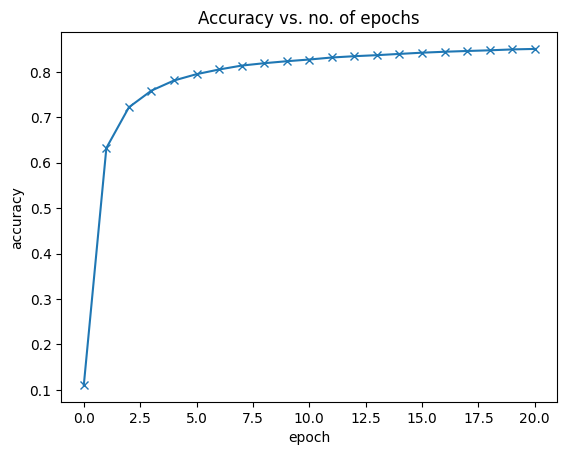

In [ ]:
history=[result0] + history1 + history2 + history3 +history4
acuracies = [result['val_acc'] for result in history]
plt.plot(acuracies, '-x')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('Accuracy vs. no. of epochs');

It's quite clear from the above picture that the model probably won't cross the accuracy threshold of 90% even after training for a very long time. One possible reason for this is that the learning rate might be too high. It's possible that the model's paramaters are "bouncing" around the optimal set of parameters that have the lowest loss. You can try reducing the learning rate and training for a few more epochs to see if it helps.

The more likely reason that the model just isn't powerful enough. If you remember our initial hypothesis, we have assumed that the output (in this case the class probabilities) is a linear function of the input (pixel intensities), obtained by perfoming a matrix multiplication with the weights matrix and adding the bias. This is a fairly weak assumption, as there may not actually exist a linear relationship between the pixel intensities in an image and the digit it represents. While it works reasonably well for a simple dataset like MNIST (getting us to 85% accuracy), we need more sophisticated models that can capture non-linear relationships between image pixels and labels for complex tasks like recognizing everyday objects, animals etc.

This would be a good time to save our work. Along with the notebook, we can also record some metrics from our training.

#testing with individual images

while we have been tracking the overall accuracy of a model so far, its also a good idea to look at model's results on some sample images. let's test out our model with some images from the predefined test datset of 10000 images. we begin by recreating the test datset with the totensor transfrom.

In [ ]:
# Define test dataset

test_dataset = MNIST(root='data/',
                     train=False,
                     transform=transforms.ToTensor())

Here's a sample image from the dataset


Shape: torch.Size([1, 28, 28])
Label: 7


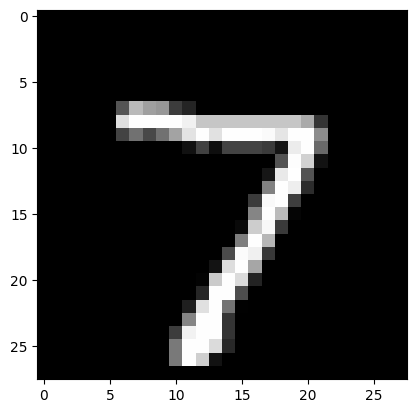

In [ ]:
img, label = test_dataset[0]
plt.imshow(img[0], cmap='gray')
print('Shape:' , img.shape)
print('Label:' , label)


In [ ]:
img.shape


torch.Size([1, 28, 28])

In [ ]:
#used to add a new dimension (also known as a batch dimension) to the tensor. This operation is common when dealing with single samples of data
#that need to be fed into models that expect batched input.
img.unsqueeze(0).shape

torch.Size([1, 1, 28, 28])

unsqueeze(0): The unsqueeze(0) method is called on the tensor img. The argument 0 indicates the position at which the new dimension (batch dimension) will be inserted. This new dimension is added at the beginning of the tensor, effectively creating a new batch with a single sample.





lets define a helper function predict_image , which returns the predicted label for a single image tensor.

In [ ]:
def predict_image(img , model):
  xb = img.unsqueeze(0)
  yb = model(xb)
  _, preds = torch.max(yb, dim=1)
  return preds[0].item()

#let's try it out with a few images.

Label:  7 , predicted:  7


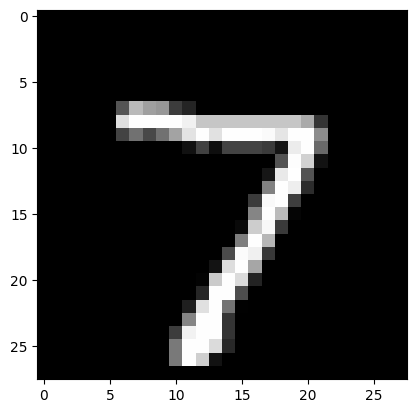

In [ ]:
img, label = test_dataset[0]
plt.imshow(img[0], cmap='gray')
print('Label: ', label, ', predicted: ' , predict_image(img, model))


Label:  0 , predicted:  0


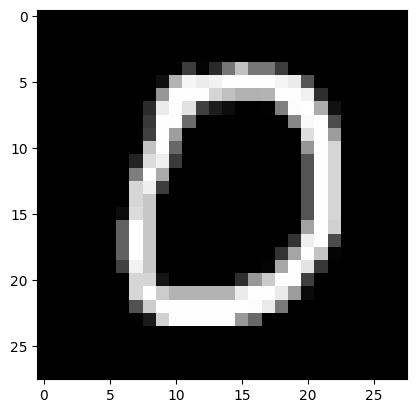

In [ ]:
img, label = test_dataset[10]
plt.imshow(img[0], cmap='gray')
print('Label: ', label, ', predicted: ' , predict_image(img, model))

Label:  9 , predicted:  3


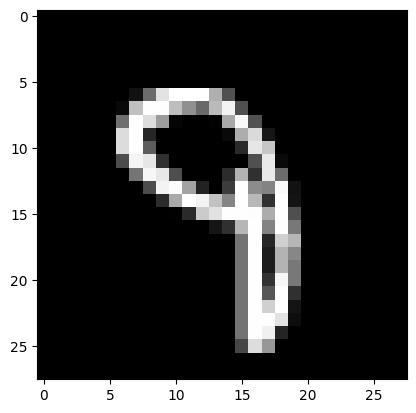

In [ ]:
img, label = test_dataset[193]
plt.imshow(img[0], cmap='gray')
print('Label: ', label, ', predicted: ' , predict_image(img, model))

Label:  6 , predicted:  6


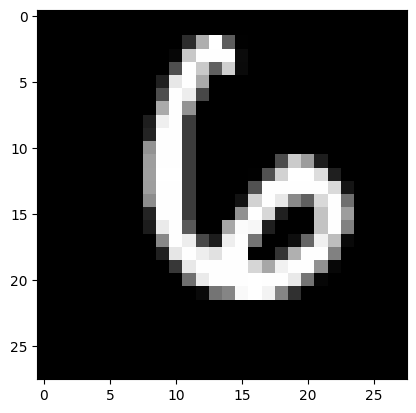

In [ ]:
img, label = test_dataset[88]
plt.imshow(img[0], cmap='gray')
print('Label: ', label, ', predicted: ' , predict_image(img, model))

Label:  9 , predicted:  7


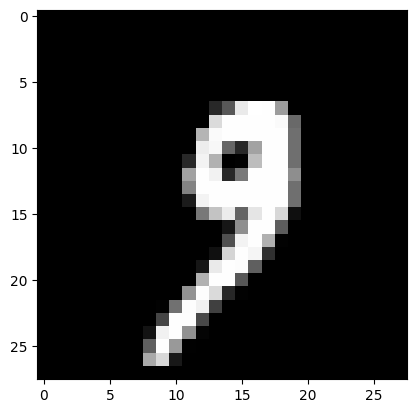

In [ ]:
img, label = test_dataset[1000]
plt.imshow(img[0], cmap='gray')
print('Label: ', label, ', predicted: ' , predict_image(img, model))

Label:  8 , predicted:  8


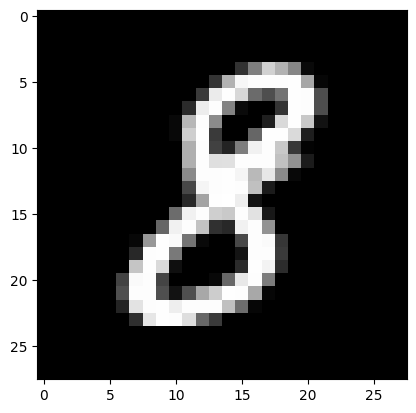

In [ ]:
img, label = test_dataset[110]
plt.imshow(img[0], cmap='gray')
print('Label: ', label, ', predicted: ' , predict_image(img, model))

Identifying where our model performs poorly can help us improve the model, by collecting more training data, increasing/decreasing the complesity of the model, and changing the hypeparameters.



As a final step, let's also look at the overall loss and accuracy of the model on the test set.

In [ ]:
test_loader = DataLoader(test_dataset, batch_size=256)
result = evaluate(model, test_loader)
result

{'val_loss': 0.6398658752441406, 'val_acc': 0.861328125}

The .state_dict method returns an orderddict containing all the weights and bias matrices mapped to the right attributes of the model.

In [ ]:
model.state_dict()

OrderedDict([('linear.weight',
              tensor([[-0.0005, -0.0180, -0.0082,  ...,  0.0236,  0.0264,  0.0041],
                      [ 0.0317, -0.0138,  0.0152,  ..., -0.0342,  0.0109, -0.0333],
                      [-0.0039,  0.0163, -0.0199,  ..., -0.0179, -0.0195, -0.0195],
                      ...,
                      [-0.0078,  0.0256,  0.0054,  ...,  0.0047,  0.0279,  0.0021],
                      [ 0.0235, -0.0102,  0.0271,  ...,  0.0210, -0.0356,  0.0100],
                      [-0.0174,  0.0139,  0.0351,  ...,  0.0035, -0.0066, -0.0119]])),
             ('linear.bias',
              tensor([-0.0710,  0.0838, -0.0068, -0.0337,  0.0207,  0.0615, -0.0043,  0.0562,
                      -0.0579,  0.0115]))])

In [ ]:
torch.save(model.state_dict(), 'mnist-logistic.pth')

to load the model weights, we can instante a new object of the class MnistModel, and use the .load_state_dict method.

In [ ]:
model2 = MnistModel()

In [ ]:
evaluate(model2, test_loader)

{'val_loss': 2.341831684112549, 'val_acc': 0.09189452975988388}

In [ ]:
model2= MnistModel()
model2.load_state_dict(torch.load('mnist-logistic.pth'))
model2.state_dict()

OrderedDict([('linear.weight',
              tensor([[-0.0005, -0.0180, -0.0082,  ...,  0.0236,  0.0264,  0.0041],
                      [ 0.0317, -0.0138,  0.0152,  ..., -0.0342,  0.0109, -0.0333],
                      [-0.0039,  0.0163, -0.0199,  ..., -0.0179, -0.0195, -0.0195],
                      ...,
                      [-0.0078,  0.0256,  0.0054,  ...,  0.0047,  0.0279,  0.0021],
                      [ 0.0235, -0.0102,  0.0271,  ...,  0.0210, -0.0356,  0.0100],
                      [-0.0174,  0.0139,  0.0351,  ...,  0.0035, -0.0066, -0.0119]])),
             ('linear.bias',
              tensor([-0.0710,  0.0838, -0.0068, -0.0337,  0.0207,  0.0615, -0.0043,  0.0562,
                      -0.0579,  0.0115]))])

Just as a sanity check, let's verify that this model has the same loss and accuracy on the test set as before.

In [ ]:
test_loader = DataLoader(test_dataset, batch_size=256)
result = evaluate(model2, test_loader)
result

{'val_loss': 0.6398658752441406, 'val_acc': 0.861328125}

{'val_loss': 0.6398658752441406, 'val_acc': 0.861328125}

In [1]:
!git init

hint: Using 'master' as the name for the initial branch. This default branch name
hint: is subject to change. To configure the initial branch name to use in all
hint: of your new repositories, which will suppress this warning, call:
hint: 
hint: 	git config --global init.defaultBranch <name>
hint: 
hint: Names commonly chosen instead of 'master' are 'main', 'trunk' and
hint: 'development'. The just-created branch can be renamed via this command:
hint: 
hint: 	git branch -m <name>
Initialized empty Git repository in /content/.git/


In [10]:
!git add .

In [11]:
!git commit -m "initial commit"

On branch master
nothing to commit, working tree clean


In [13]:
!git push origin main

error: src refspec main does not match any
error: failed to push some refs to 'origin'


In [16]:
!git checkout main

error: pathspec 'main' did not match any file(s) known to git


In [5]:
!git config --global user.email "mikhalaskhan2020@gmail.com"

In [7]:
!git config --global user.name "Muhammad Ikhalas"